<a href="https://colab.research.google.com/github/dayanebravo/AED/blob/main/AED_AP_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise Exploratória de Dados - AED** - **Aula Prática 06**

> Importar bibliotecas e dados

In [ ]:
import pandas as pd  # biblioteca com ferramentas para análise de dados/dataframes
import numpy as np  # biblioteca com operações matemáticas

In [ ]:
df1 = pd.read_csv("https://raw.githubusercontent.com/dayanebravo/AED/main/pes_2012.csv")  # ler dados no formato CSV
df1.head()  #  exibe as primeiras linhas da tabela

In [ ]:
df1["V4718"] = pd.to_numeric(df1["V4718"],errors="coerce")  # transformar dados da coluna em float e os erros substituir por NaN
df1["V4720"] = pd.to_numeric(df1["V4720"],errors="coerce")

In [ ]:
df = df1.dropna()  # criando um NOVO dataframe com as linhas inválidas removidas
df.head()  #  exibe as primeiras linhas da tabela

In [ ]:
import matplotlib.pyplot as plt  # biblioteca básico para gráficos 
import seaborn as sn  # biblioteca auxiliar para gráficos
sn.set(style="ticks",palette="viridis")  # definir estilo de gráfico e cor

>**Gráfico de dispersão**

In [ ]:
plt.figure(figsize=(8,8))  # tamanho do gráfico

sn.scatterplot(x=df.V8005,y=df.V4720)  #gráfico de dispersão (eixo x, eixo y)

plt.ylabel('renda')  # nome do eixo y
plt.xlabel('idade')  # nome do eixo x
plt.show()  # exibir gráfico

In [ ]:
amostra = df.loc[(df.V8005>=18) & (df.V8005<=80) & (df.V4720>0)]  # seleciona uma amostra dos dados
plt.figure(figsize=(8,8))  # tamanho do gráfico

sn.scatterplot(x=amostra.V8005,y=amostra.V4720)  # gráfico de dispersão (eixo x, eixo y)

plt.ylabel('renda')  # nome do eixo y
plt.xlabel('idade')  # nome do eixo x
plt.show()  # exibir gráfico

In [ ]:
dado = amostra.groupby('V8005').agg({'V4720':'mean'})  # agrupa os dados da amostra
dado.reset_index(inplace=True)  # preenche todas as linhas da coluna
plt.figure(figsize=(10,5))  # tamanho do gráfico

sn.scatterplot(x=dado.V8005,y=dado.V4720)  # gráfico de dispersão (eixo x, eixo y)

plt.ylabel('renda média')  # nome do eixo y
plt.xlabel('idade')  # nome do eixo x
plt.show()  # exibir gráfico

In [ ]:
dado = amostra.groupby('V8005').agg({'V4720':'std'})  # agrupa os dados da amostra
dado.reset_index(inplace=True)  # preenche todas as linhas da coluna
plt.figure(figsize=(10,5))  # tamanho do gráfico

sn.scatterplot(x=dado.V8005,y=dado.V4720)  #gráfico de dispersão (eixo x, eixo y)

plt.ylabel('desvio padrão - renda')  # nome do eixo y
plt.xlabel('idade')  # nome do eixo x
plt.show()  # exibir gráfico

In [ ]:
df.groupby('V0302').agg({'V4720':'mean'})  # agrupa os dados da amostra
plt.figure(figsize=(5,5))  # tamanho do gráfico

sn.scatterplot(x=df.V0302,y=df.V4720)  #gráfico de dispersão (eixo x, eixo y)

plt.ylabel('renda média')  # nome do eixo y
plt.xlabel('')  # nome do eixo x
plt.show()  # exibir gráfico

In [ ]:
df.groupby('UF').agg({'V4720':'mean'})  # agrupa os dados da amostra
plt.figure(figsize=(8,10))  # tamanho do gráfico

sn.scatterplot(x=df.V4720,y=df.UF)  #gráfico de dispersão (eixo x, eixo y)

plt.ylabel('')  # nome do eixo y
plt.xlabel('renda média')  # nome do eixo x
plt.show()  # exibir gráfico

In [ ]:
df.groupby('UF').agg({'V8005':'mean'})  # agrupa os dados da amostra
plt.figure(figsize=(8,10))  # tamanho do gráfico

sn.scatterplot(x=df.V8005,y=df.UF)  #gráfico de dispersão (eixo x, eixo y)

plt.ylabel('')  # nome do eixo y
plt.xlabel('idade média')  # nome do eixo x
plt.show()  # exibir gráfico

## **Coeficiente de variação - estabilidade**
> 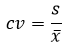

In [ ]:
cv_idade = df.V8005.std()/df.V8005.mean()  # calcular cv
cv_salario = df.V4720.std()/df.V4720.mean()
print("cv das idades: ", cv_idade , "\n cv das rendas: ",  cv_salario)   # comparar os cv


## **Coeficiente de Pearson - assimetria**

> 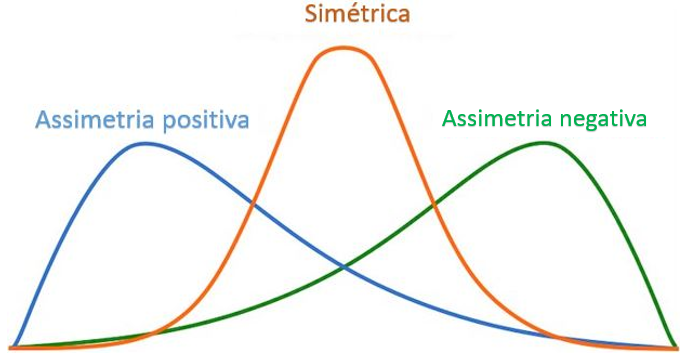

> 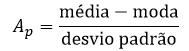

In [ ]:
cp_idade = ((df.V8005.mean()-df.V8005.mode())/df.V8005.std()) # calcular cp
cp_salario = ((df.V4720.mean()-df.V4720.mode())/df.V4720.std())
print("cp das idades: ", cp_idade , "\n cp das rendas: ",  cp_salario)   # comparar os cp

In [ ]:
idade = df.V8005  # coluna analisada 
sn.kdeplot(data=idade, fill=True)  # tipo do gráfico com preenchimento de cor
plt.ylabel('freq. pessoas')  # nome do eixo y
plt.xlabel('idade')  # nome do eixo x
plt.show()  # exibir gráfico

In [ ]:
renda = df.V4720  # coluna analisada 
sn.kdeplot(data=renda, fill=True, clip=(1,10000))  # tipo do gráfico com preenchimento de cor e limite para os eixos
plt.ylabel('freq. pessoas')  # nome do eixo y
plt.xlabel('renda')  # nome do eixo x
plt.show()  # exibir gráfico

## **Curtose** 

> 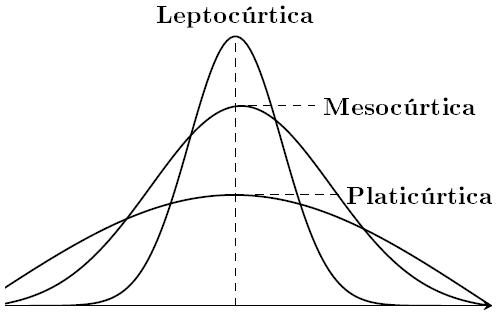

> 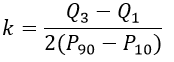
>> 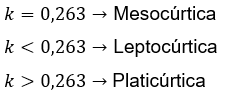

In [ ]:
# Ordena e salva em um novo DataFrame
dfo = df.sort_values(by="V8005")

In [ ]:
n=len(dfo.V8005)

Q1=np.quantile(df.V8005, .25)  # primeiro quartil
Q3=np.quantile(df.V8005, .75)  # terceiro quartil
ip90=np.percentile(df.V8005, 90)  # percentil 90
ip10=np.percentile(df.V8005, 10)  # percentil 10

k=((Q3-Q1)/2)/(ip90-ip10)  # fórmula

print("A curtose é: ", k)

In [ ]:
idade = df.V8005  # coluna analisada 

sn.kdeplot(idade, fill=True)  # dristribuição

plt.ylabel('frequência pessoas')  # nome do eixo y
plt.xlabel('idade')  # nome do eixo x

plt.show()  # exibir gráfico

> Faremos o mesmo agora para a coluna de rendas:

In [ ]:
dfo = df.sort_values(by="V4720")

In [ ]:
n=len(dfo.V4720)

Q1=np.quantile(df.V4720, .25)  # primeiro quartil
Q3=np.quantile(df.V4720, .75)  # terceiro quartil
ip90=np.percentile(df.V4720, 90)  # percentil 90
ip10=np.percentile(df.V4720, 10)  # percentil 10

k=((Q3-Q1)/2)/(ip90-ip10)  # fórmula

print("A curtose é: ", k)

In [ ]:
renda = dfo.V4720  # coluna analisada 

sn.kdeplot(renda, fill=True, clip=(1,10000))  # quantidade de intervalos - não cumulativo

plt.ylabel('frequência pessoas')  # nome do eixo y
plt.xlabel('renda')  # nome do eixo x

plt.show()  # exibir gráfico

> Comparando as amplitudes:

In [ ]:
i = df['V8005'].max()-df['V8005'].min()  # fórmula
r = df['V4720'].max()-df['V4720'].min()  # fórmula
print("A amplitude das idades é: ", i,
      "\n e a amplitude das rendas é: ", r)